In [1]:
%load_ext watermark

In [2]:
%watermark -a "E. Kaan Ulgen" -p numpy,scipy,matplotlib,pandas,scikit-learn

E. Kaan Ulgen 

numpy 1.16.2
scipy 1.2.0
matplotlib 3.1.0
pandas 1.0.4
sklearn 0.23.2


## Destek Vektör Makineleri

- Temelleri Vladimir Vapnik ve Alexey Chervonenkis tarafından hesaplabilir öğrenme teorisinin önemli bir kısmını oluşturan ve öğrenmenin temel teorisi olarak bilinen Vapnik-Chervonenkis teorisine dayanmaktadır.
- Destek Vektör Makineleri (DVM) 1992 yılında Vladimir Vapnik, Berhard Boser ve Isabelle Guyon tarafından sunulmuştur. 1990'lı yılların sonuna doğru yaygın olarak kullanılmaya başlamıştır

### Genel Özellikler
- Destek Vektör Makineleri (DVM), başlangıçta iki sınıflı doğrusal verilerin sınıflandırılması problemi için tasarlanmış, daha sonra çok sınıflı ve doğrusal olmayan verilerin sınıflandırılması için genelleştirilmiştir.
- DVM temelde iki sınıfı birbirinden ayırabilen en uygun karar fonksiyonun tahmin edilmesi veya iki sınıfı birbirinden en uygun şekilde ayırabilen hiper-düzlemin tanımlanmasına dayanmaktadır  (Vapnik, 1995; Vapnik, 2000; Kavzoğlu, 2010).
- DVM, el yazısı tanıma, zaman serisi analiz, konuşma tanıma, örüntü tanıma gibi sınıflandırma problemlerinin birçoğunda başarı ile uygulanmıştır. 
- DVM, dış bükey optimizasyona dayalı bir algoritmadır. 
- Doğrusal olmayan bir eşlem ile n boyutlu veri kümesi k > n olacak şekilde k boyutlu yeni bir veri kümesine dönüştürülür.
- DVM ile yüksek boyutta doğrusal sınıflandırma işlemi yapılır.
- Hiper düzleme en yakın öğrenme verileri destek vektörleri (veya destek noktaları) olarak adlandırılır.
- Destek noktaları arasındaki genişlik, margin olarak adlandırılır. DVM, desktek noktaları arasındaki genişliği maksimize etmeyi amaçlayan bir denetimli öğrenme algoritmasıdır.

### Algoritmanın Avantajları:
- Karmaşık karar sınırları modellenebiliyor.
- Çok sayıda bağımsız değişkenle çalışabilmektedir.
- Hem doğrusal olarak ayrılan verilere hem de ayrılamayanlara uygulanabilmektedir.
- Aşırı uyum sorunu, diğer birçok yönteme göre daha azdır (Bilgin, 2018).


- DVM algoritması, problemleri temelde 3 başlık altında incelemektedir:
    - Verileri doğrusal olarak ayrılabilenler
    - Verileri doğrusal olarak ayrılamayanlar ve
    - Çoklu sınıf problemleri

### Doğrusal Destek Vektör Makineleri

- İki sınıflı bir veri setine sahip olalım. 
- DVM algoritması kullanılarak bu iki sınıfa ait örneklerin, eğitim verisi ile elde edilen bir karar fonksiyonu yardımıyla birbirinden ayrılması amaçlanır. 
- Karar fonksiyonu kullanılarak eğitim verisini en uygun şekilde ayırabilecek hiperdüzlem bulunur. 
- Bu hayali veri setimiz 2 boyutlu olduğu için hiperdüzlem yerine karar doğrusu veya çizgisi gibi ifadeleride kullanabiliriz.

$$(x_i, y_i) => i=1,2,...,n$$

$$x_i= Özniteliklerden \ oluşan \ bir \ vektör.$$

$$x_i \in \mathbb{R}^{p} $$

$$y_i \in \{-1,1\}$$ 

$$ \{x\in \mathbb{R}^{p}: \beta^Tx_i + \beta_0 =0, \beta \in \mathbb{R}^{p}, \beta_0 \in \mathbb{R} \}$$

In [3]:
from IPython.display import Image
%matplotlib inline

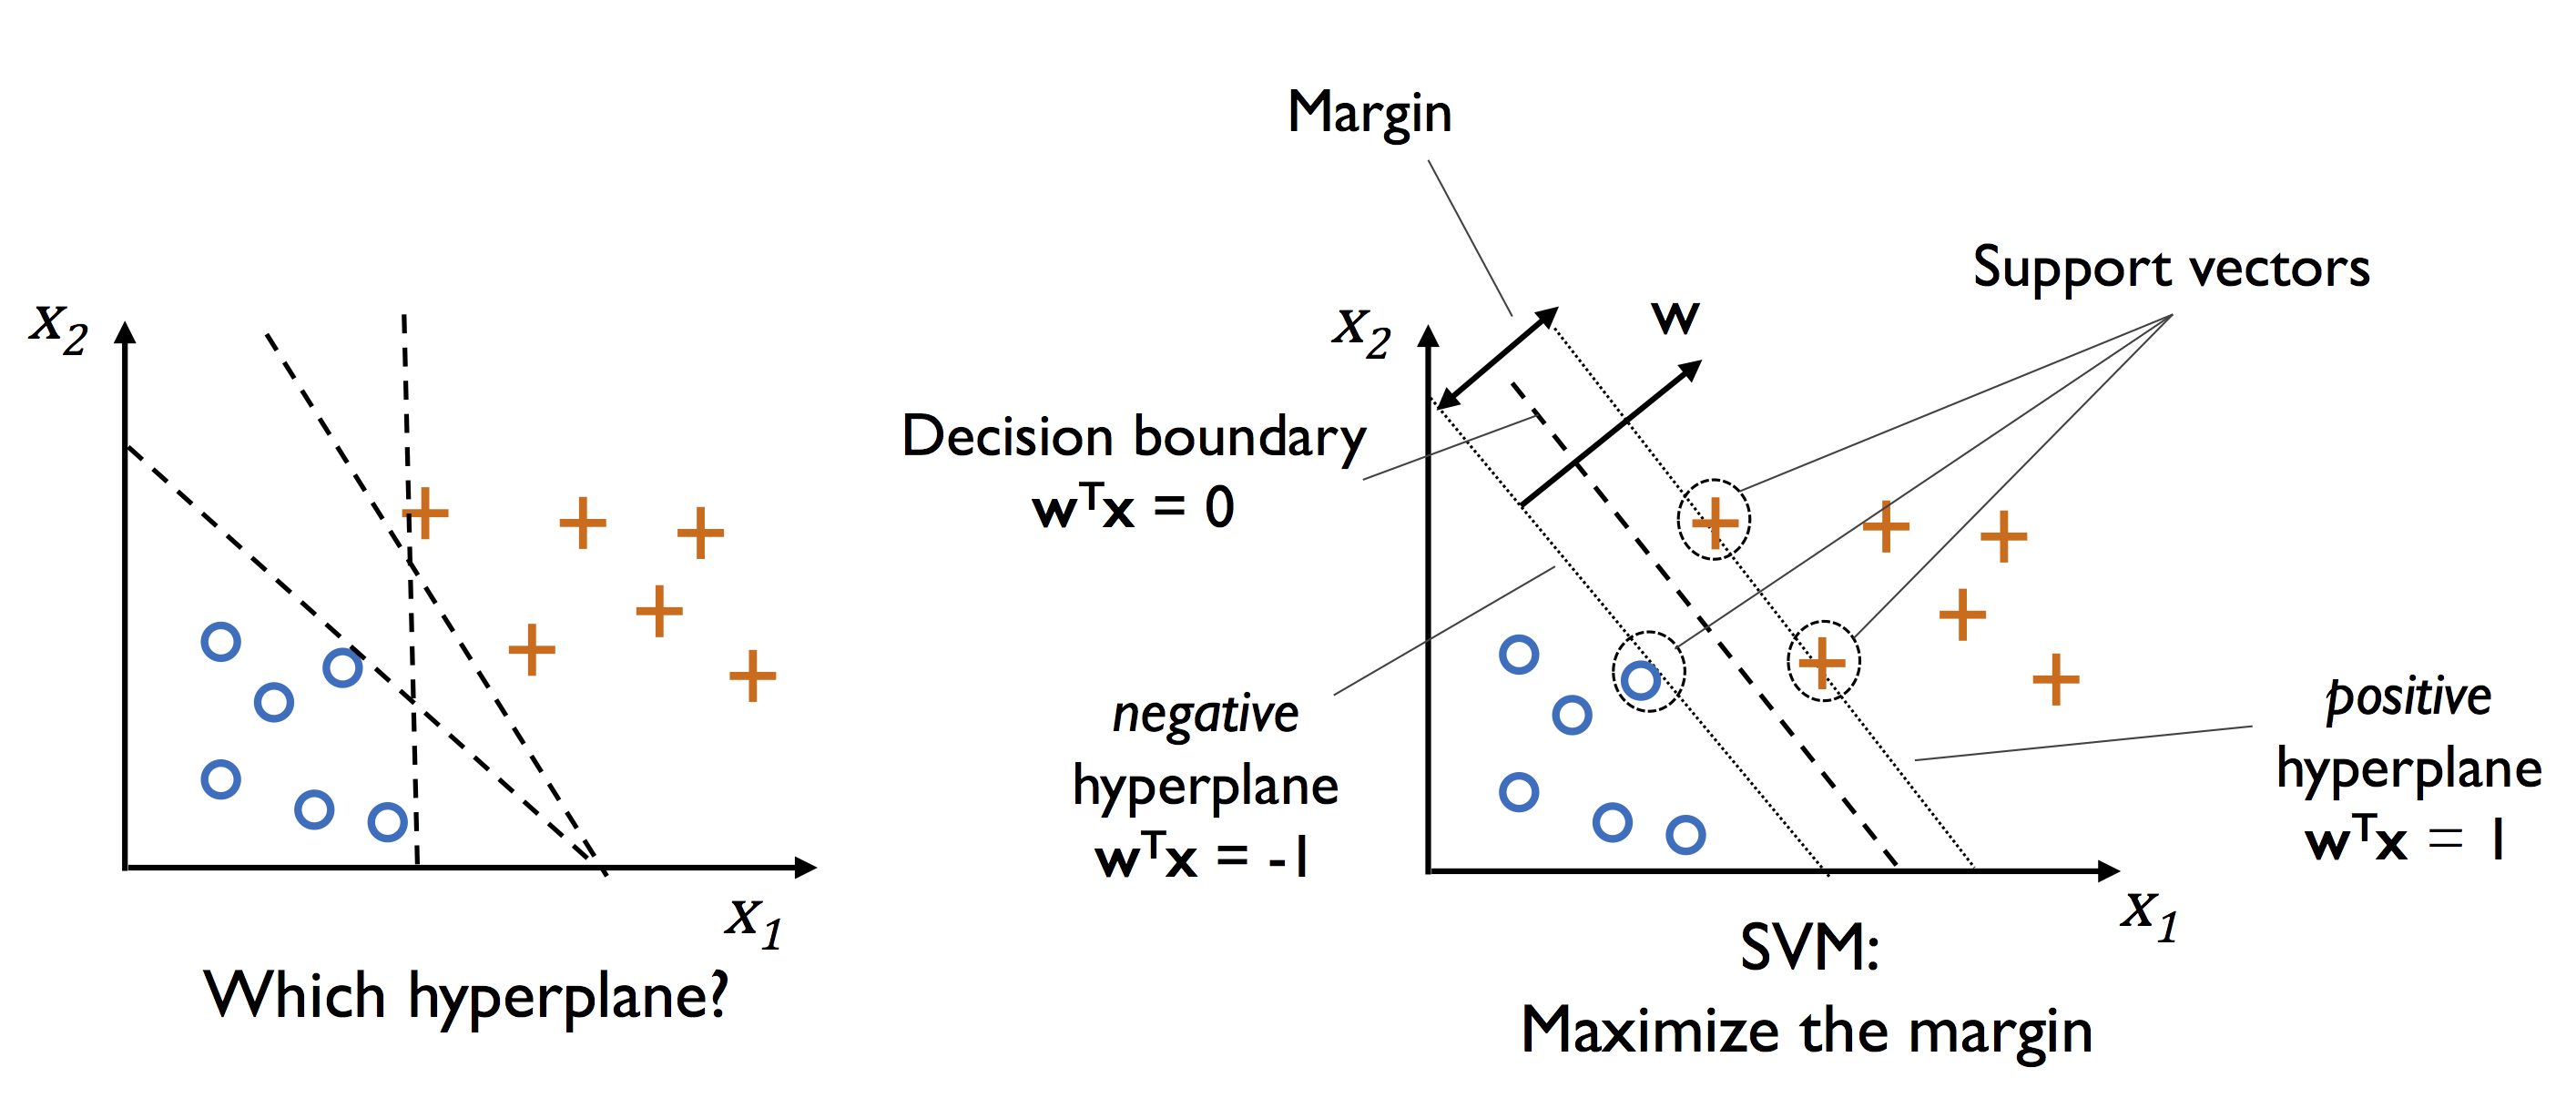

In [4]:
Image(filename='./03_09_svm.png', width=700)

- Farklı bir çok düzlem kullanarak bu iki sınıfı ayırabiliriz. Amacımız bu düzlemlerden en uygun olanı bulmak.
- Yani DVM’nin amacı kendisine en yakın noktalar arasındaki uzaklığı maksimuma çıkaran hiper-düzlemi bulabilmektir. 
- Sınır düzlemlerine, optimum hiper-düzlem ve sınır genişliğini sınırlandıran noktalara ise destek vektörleri denir.  Düzlemin nereden geçeceğini belirleyen bu vektörler aslında girdi verilerimizdir (Girdi Vektörü).

$$ \beta^Tx_i + \beta_0 - \Delta = 0 $$

$$ \beta^Tx_i + \beta_0 + \Delta = 0 $$

$$ \Delta = Düzlemi \ veya \ doğruyu \ ne \ kadar \ kaydıracağımızı \ belirliyor.$$


$ \Delta'yı \ belirleyen \ sınır \ noktaları: $

$ y_i = 1 \ için $

$$ \beta^Tx_i + \beta_0 \geq \Delta $$

$ y_i = -1 \ için $

$$ \beta^Tx_i + \beta_0 \leq \Delta $$

- Kolaylık olması için $\Delta$ = 1 olarak alıyoruz

$(x_i, y_i) => i=1,2,...,n$

$ y_i$ = 1 için:

$$ \beta^Tx_i + \beta_0 - 1 \geq 0 $$ 

$$ \beta^Tx_i + \beta_0 \geq 1 $$ 

$ y_i = -1 $ için ise:

$$ \beta^Tx_i + \beta_0 + 1 \leq 0 $$ 

$$ \beta^Tx_i + \beta_0 \leq -1 $$ 

### Maksimum Margin

$$ \beta^Tx_{pos} + \beta_0 = 1 $$

$$ \beta^Tx_{neg} + \beta_0 = -1 $$

- iki doğrusal denklemi birbirinden çıkaralım:
$$\beta^T(x_{pos} - x_{neg}) = 2$$  

- Bu denklemi $\beta$ vektörünün uzunluğuyla normalize edebiliriz:
$$||\beta|| = \sqrt{\sum_{j=1}^{m}\beta_{j}^2} $$


- Elde edilen margin uzunluğu (iki düzlem arasındaki mesafe):
    
    $$\frac{\beta^T(x_{pos} - x_{neg})}{||\beta||} = \frac{2}{||\beta||}$$

**Optimasyon Problemi:**

- En küçükleme -> Optimizasyon için
- Doğrusal olarak ayrılabilen veri kullanıyoruz. 
- Amaç fonksiyonu minimize edilir. $\beta$ norm'unu mümkün olduğunca küçük tutmaya çalışıyoruz (Norm bana verilen vektörün boyunu ölçüyor).
- $\beta$yı öyle seçilsinki bu iki düzlem birbirinden en büyük mesafede olsun.
- Amaç fonksiyonu dış bükey bir fonksiyon.

$$ \frac{1}{2}\beta^T \beta$$

- Quadratic optimizasyon problemi

### Uygulama Kısmı

In [14]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    
    if test_idx:
        
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

In [5]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd

iris = load_iris()

df_iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [6]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [7]:
X = df_iris.iloc[:, 2:4].values
y = df_iris.target.values

In [8]:
print('Sınıf Bilgisi:', np.unique(y))

Sınıf Bilgisi: [0. 1. 2.]


### Veri Önişleme Adımları

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

#### Standartlaştırma

- **Standardizasyon:** Ortalama değerin 0, standart sapmasının 1 olduğu dağılımdır. 
    - İlgili niteliğin değerinden ortalama değer çıkartılır ve varyans değerine bölünür.
$$x^{[i]}_{\text{std}} = \frac{x^{[i]} - \mu_x }{ \sigma_{x} }$$

In [11]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### Support Vector Machine - Destek Vektör Makineleri

In [12]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_std, y_train)

SVC(kernel='linear', random_state=42)

In [13]:
SVC?

#### Görselleştirme

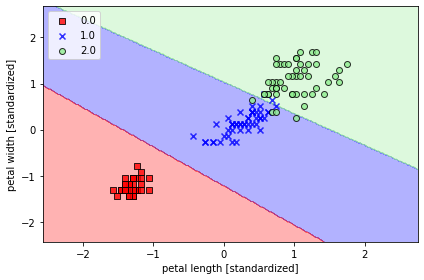

In [11]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined_std, 
                      y_combined,
                      classifier=svm)

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## Doğrusal Olmayan Destek Vektör Makineleri

### Kaynaklar:
 1. Metin Bilgin, Makine Öğrenmesi, Papatya Bilim
 2. S. İlker Birbil, Makine Öğrenmesi Ders Notları, 2018 (http://www.veridefteri.com/2018/12/13/tahmin-ve-cikarim-9-destek-vektor-makineleri/)
 3. Haldun Akpınar, DATA, Papatya Bilim
 4. Sebastian Raschka ve Vahid Mirjalili, Python Machine Learning (3rd Ed.), Packt
 5. http://scikit-learn.org/stable/modules/svm.html